In [81]:
# Import dependencies and setup
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as p
import matplotlib.image as mpimg

In [3]:
# Load the CSV files
ccrpi_2015 = "../Data/CCRPI2015_Scoring_By_Component.csv"
ccrpi_2016 = "../Data/CCRPI2016_Scoring_By_Component.csv"
ccrpi_2017 = "../Data/CCRPI2017_Scoring_By_Component.csv"
ccrpi_2018 = "../Data/CCRPI2018_Scoring_By_Component.csv"
ccrpi_2019 = "../Data/CCRPI2019_Scoring_By_Component.csv"

# Read data into pandas data frames
ccrpi_2015_df = pd.read_csv(ccrpi_2015)
ccrpi_2016_df = pd.read_csv(ccrpi_2016)
ccrpi_2017_df = pd.read_csv(ccrpi_2017)
ccrpi_2018_df = pd.read_csv(ccrpi_2018)
ccrpi_2019_df = pd.read_csv(ccrpi_2019)

#ccrpi_2015_df.head()
#ccrpi_2016_df.head()
#ccrpi_2017_df.head()
#ccrpi_2018_df.head()
ccrpi_2019_df.head()

,School Year,System ID,System Name,School ID,School Name,Grade Configuration,Grade Cluster,Content Mastery,Progress,Closing Gaps,Readiness,Graduation Rate,CCRPI Score,Single Score
0,2019,601,Appling County,0103,Appling County High School,"09, 10, 11, 12",H,68.6,80.8,68.0,74.1,90.0,76.2,76.2
1,2019,601,Appling County,0177,Appling County Elementary School,"03, 04, 05",E,61.3,80.7,50.0,76.5,NaN,69.4,69.4
2,2019,601,Appling County,0195,Appling County Middle School,"06, 07, 08",M,63.4,78.2,87.5,79.4,NaN,75.4,75.4
3,2019,601,Appling County,0277,Appling County Primary School,"PK, KK, 01, 02",E,62.3,100.0,32.1,75.8,NaN,60.0,60.0
4,2019,601,Appling County,1050,Altamaha Elementary School,"PK, KK, 01, 02, 03, 04, 05",E,59.9,90.2,35.7,80.9,NaN,71.1,71.1


In [4]:
# Drop unmatched columnms in each data frame
ccrpi_2015_cleaned_df = ccrpi_2015_df[['School Year', 'System Name', 'School Name', 'Grade Cluster', 'CCRPI Score']].copy()
#ccrpi_2015_cleaned_df.head()

ccrpi_2016_cleaned_df = ccrpi_2016_df[['School Year', 'System Name', 'School Name', 'Grade Cluster', 'CCRPI Score']].copy()
#ccrpi_2016_cleaned_df.head()

ccrpi_2017_cleaned_df = ccrpi_2017_df[['School Year', 'System Name', 'School Name', 'Grade Cluster', 'CCRPI Score']].copy()
#ccrpi_2017_cleaned_df.head()

ccrpi_2018_cleaned_df = ccrpi_2018_df[['School Year', 'System Name', 'School Name', 'Grade Cluster', 'CCRPI Score']].copy()
#ccrpi_2018_cleaned_df.head()

ccrpi_2019_cleaned_df = ccrpi_2019_df[['School Year', 'System Name', 'School Name', 'Grade Cluster', 'CCRPI Score']].copy()
ccrpi_2019_cleaned_df.head()

,School Year,System Name,School Name,Grade Cluster,CCRPI Score
0,2019,Appling County,Appling County High School,H,76.2
1,2019,Appling County,Appling County Elementary School,E,69.4
2,2019,Appling County,Appling County Middle School,M,75.4
3,2019,Appling County,Appling County Primary School,E,60.0
4,2019,Appling County,Altamaha Elementary School,E,71.1


In [5]:
# Gather Fulton County Schools data
ccrpi_2015_cleaned_df = ccrpi_2015_cleaned_df.loc[ccrpi_2015_df["System Name"] == "Fulton County"]
#ccrpi_2015_cleaned_df.head()

ccrpi_2016_cleaned_df = ccrpi_2016_cleaned_df.loc[ccrpi_2016_df["System Name"] == "Fulton County"]
#ccrpi_2016_cleaned_df.head()

ccrpi_2017_cleaned_df = ccrpi_2017_cleaned_df.loc[ccrpi_2017_df["System Name"] == "Fulton County"]
#ccrpi_2017_cleaned_df.head()

ccrpi_2018_cleaned_df = ccrpi_2018_cleaned_df.loc[ccrpi_2018_df["System Name"] == "Fulton County"]
#ccrpi_2018_cleaned_df.head()

ccrpi_2019_cleaned_df = ccrpi_2019_cleaned_df.loc[ccrpi_2019_df["System Name"] == "Fulton County"]
ccrpi_2019_cleaned_df.head()

,School Year,System Name,School Name,Grade Cluster,CCRPI Score
1204,2019,Fulton County,Summit Hill Elementary,E,82.0
1205,2019,Fulton County,Abbotts Hill Elementary School,E,87.9
1206,2019,Fulton County,Creek View Elementary School,E,97.4
1207,2019,Fulton County,Hembree Springs Elementary School,E,91.7
1208,2019,Fulton County,Spalding Drive Elementary,E,90.1


In [6]:
# Separate "All Schools" from Individual School Data
schools_only_2015 = ccrpi_2015_cleaned_df[ccrpi_2015_cleaned_df["School Name"] == "All Schools"].index 
ccrpi_2015_cleaned_df.drop(schools_only_2015, inplace = True)
#ccrpi_2015_cleaned_df.head(10)

schools_only_2016 = ccrpi_2016_cleaned_df[ccrpi_2016_cleaned_df["School Name"] == "All Schools"].index 
ccrpi_2016_cleaned_df.drop(schools_only_2016, inplace = True)
#ccrpi_2016_cleaned_df.head(10)

schools_only_2017 = ccrpi_2017_cleaned_df[ccrpi_2017_cleaned_df["School Name"] == "All Schools"].index 
ccrpi_2017_cleaned_df.drop(schools_only_2017, inplace = True)
#ccrpi_2017_cleaned_df.head(10)

schools_only_2018 = ccrpi_2018_cleaned_df[ccrpi_2018_cleaned_df["School Name"] == "All Schools"].index 
ccrpi_2018_cleaned_df.drop(schools_only_2018, inplace = True)
#ccrpi_2018_cleaned_df.head(10)

schools_only_2019 = ccrpi_2019_cleaned_df[ccrpi_2019_cleaned_df["School Name"] == "All Schools"].index 
ccrpi_2019_cleaned_df.drop(schools_only_2019, inplace = True)
ccrpi_2019_cleaned_df.head(10)

,School Year,System Name,School Name,Grade Cluster,CCRPI Score
1204,2019,Fulton County,Summit Hill Elementary,E,82.0
1205,2019,Fulton County,Abbotts Hill Elementary School,E,87.9
1206,2019,Fulton County,Creek View Elementary School,E,97.4
1207,2019,Fulton County,Hembree Springs Elementary School,E,91.7
1208,2019,Fulton County,Spalding Drive Elementary,E,90.1
1209,2019,Fulton County,Hopewell Middle School,M,84.3
1210,2019,Fulton County,Milton High School,H,90.4
1211,2019,Fulton County,Renaissance Middle School,M,62.7
1212,2019,Fulton County,Renaissance ES,E,78.7
1213,2019,Fulton County,Feldwood Elementary School,E,69.0


In [7]:
# Concatenate data frame for all FCS data
fcs_data = pd.concat([ccrpi_2015_cleaned_df, ccrpi_2016_cleaned_df, ccrpi_2017_cleaned_df, ccrpi_2018_cleaned_df, ccrpi_2019_cleaned_df])
fcs_data.count()

School Year      559
System Name      559
School Name      559
Grade Cluster    559
CCRPI Score      536
dtype: int64

In [8]:
# Sort the data alphabetically and by year
fcs_data_sorted = fcs_data.sort_values(["School Name", "School Year"], ascending = True)
fcs_data_sorted.head(10)

,School Year,System Name,School Name,Grade Cluster,CCRPI Score
1208,2015,Fulton County,Abbotts Hill Elementary School,E,90.9
1209,2016,Fulton County,Abbotts Hill Elementary School,E,88.1
1206,2017,Fulton County,Abbotts Hill Elementary School,E,91.5
1205,2018,Fulton County,Abbotts Hill Elementary School,E,95.8
1205,2019,Fulton County,Abbotts Hill Elementary School,E,87.9
1295,2015,Fulton County,Alpharetta Elementary School,E,84.6
1294,2016,Fulton County,Alpharetta Elementary School,E,91.0
1291,2017,Fulton County,Alpharetta Elementary School,E,95.8
1290,2018,Fulton County,Alpharetta Elementary School,E,87.7
1290,2019,Fulton County,Alpharetta Elementary School,E,88.7


In [15]:
# Descriptive stats for all FCS data
fcs_data_sorted["CCRPI Score"].describe()

count    536.000000
mean      76.069216
std       15.059837
min       37.100000
25%       63.550000
50%       78.200000
75%       89.325000
max      104.500000
Name: CCRPI Score, dtype: float64

In [29]:
#Desscriptive stats for Elementary Schools
elementary_schools = fcs_data_sorted.loc[fcs_data_sorted["Grade Cluster"] == "E", :]
elementary_schools["CCRPI Score"].describe()

count    318.000000
mean      76.127673
std       14.800752
min       45.800000
25%       63.325000
50%       77.550000
75%       89.175000
max      104.500000
Name: CCRPI Score, dtype: float64

In [30]:
#Desscriptive stats for Middle Schools
middle_schools = fcs_data_sorted.loc[fcs_data_sorted["Grade Cluster"] == "M", :]
middle_schools["CCRPI Score"].describe()

count    126.000000
mean      75.223810
std       14.479494
min       46.100000
25%       63.850000
50%       77.900000
75%       87.200000
max       99.500000
Name: CCRPI Score, dtype: float64

In [19]:
#Desscriptive stats for High Schools
high_schools = fcs_data_sorted.loc[fcs_data_sorted["Grade Cluster"] == "H", :]
high_schools["CCRPI Score"].describe()

count     92.00000
mean      77.02500
std       16.74384
min       37.10000
25%       64.20000
50%       79.50000
75%       92.55000
max      101.20000
Name: CCRPI Score, dtype: float64

In [51]:
#Get average CCRPI scores per school type for each year
elementary_schools_2015 = elementary_schools.loc[elementary_schools["School Year"] == 2015, :]
#elementary_schools_2015["CCRPI Score"].mean()

elementary_schools_2016 = elementary_schools.loc[elementary_schools["School Year"] == 2016, :]
#elementary_schools_2016["CCRPI Score"].mean()

elementary_schools_2017 = elementary_schools.loc[elementary_schools["School Year"] == 2017, :]
#elementary_schools_2017["CCRPI Score"].mean()

elementary_schools_2018 = elementary_schools.loc[elementary_schools["School Year"] == 2018, :]
#elementary_schools_2018["CCRPI Score"].mean()

elementary_schools_2019 = elementary_schools.loc[elementary_schools["School Year"] == 2019, :]
elementary_schools_2019["CCRPI Score"].mean()

79.59692307692309

In [66]:
#Create a data frame to hold average CCRPI scores
elementary_2015_avg = elementary_schools_2015["CCRPI Score"].mean()
elementary_2016_avg = elementary_schools_2016["CCRPI Score"].mean()
elementary_2017_avg = elementary_schools_2017["CCRPI Score"].mean()
elementary_2018_avg = elementary_schools_2018["CCRPI Score"].mean()
elementary_2019_avg = elementary_schools_2019["CCRPI Score"].mean()

elementary_avg_scores = pd.DataFrame({"Grade Cluster": "Elementary School",
                                      "2015": [elementary_2015_avg],
                                     "2016": [elementary_2016_avg],
                                    "2017": [elementary_2017_avg],
                                    "2018": [elementary_2018_avg],
                                     "2019": [elementary_2019_avg]})

elementary_avg_scores

,Grade Cluster,2015,2016,2017,2018,2019
0,Elementary School,74.855556,72.977049,76.98125,76.007692,79.596923


In [67]:
#Get average CCRPI scores per school type for each year
middle_schools_2015 = middle_schools.loc[middle_schools["School Year"] == 2015, :]
#middle_schools_2015["CCRPI Score"].mean()

middle_schools_2016 = middle_schools.loc[middle_schools["School Year"] == 2016, :]
#middle_schools_2016["CCRPI Score"].mean()

middle_schools_2017 = middle_schools.loc[middle_schools["School Year"] == 2017, :]
#middle_schools_2017["CCRPI Score"].mean()

middle_schools_2018 = middle_schools.loc[middle_schools["School Year"] == 2018, :]
#middle_schools_2018["CCRPI Score"].mean()

middle_schools_2019 = middle_schools.loc[middle_schools["School Year"] == 2019, :]
middle_schools_2019["CCRPI Score"].mean()

81.04230769230769

In [68]:
#Create a data frame to hold average CCRPI scores
middle_2015_avg = middle_schools_2015["CCRPI Score"].mean()
middle_2016_avg = middle_schools_2016["CCRPI Score"].mean()
middle_2017_avg = middle_schools_2017["CCRPI Score"].mean()
middle_2018_avg = middle_schools_2018["CCRPI Score"].mean()
middle_2019_avg = middle_schools_2019["CCRPI Score"].mean()

middle_avg_scores = pd.DataFrame({"Grade Cluster": "Middle School",
                                  "2015": [middle_2015_avg],
                                     "2016": [middle_2016_avg],
                                    "2017": [middle_2017_avg],
                                    "2018": [middle_2018_avg],
                                     "2019": [middle_2019_avg]})

middle_avg_scores

,Grade Cluster,2015,2016,2017,2018,2019
0,Middle School,72.378261,72.16,74.580769,75.511538,81.042308


In [69]:
#Get average CCRPI scores per school type for each year
high_schools_2015 = high_schools.loc[high_schools["School Year"] == 2015, :]
#high_schools_2015["CCRPI Score"].mean()

high_schools_2016 = high_schools.loc[high_schools["School Year"] == 2016, :]
#high_schools_2016["CCRPI Score"].mean()

high_schools_2017 = high_schools.loc[high_schools["School Year"] == 2017, :]
#high_schools_2017["CCRPI Score"].mean()

high_schools_2018 = high_schools.loc[high_schools["School Year"] == 2018, :]
#high_schools_2018["CCRPI Score"].mean()

high_schools_2019 = high_schools.loc[high_schools["School Year"] == 2019, :]
high_schools_2019["CCRPI Score"].mean()

78.76666666666668

In [70]:
#Create a data frame to hold average CCRPI scores
high_2015_avg = high_schools_2015["CCRPI Score"].mean()
high_2016_avg = high_schools_2016["CCRPI Score"].mean()
high_2017_avg = high_schools_2017["CCRPI Score"].mean()
high_2018_avg = high_schools_2018["CCRPI Score"].mean()
high_2019_avg = high_schools_2019["CCRPI Score"].mean()

high_avg_scores = pd.DataFrame({"Grade Cluster": "High School",
                                "2015": [high_2015_avg],
                                     "2016": [high_2016_avg],
                                    "2017": [high_2017_avg],
                                    "2018": [high_2018_avg],
                                     "2019": [high_2019_avg]})

high_avg_scores

,Grade Cluster,2015,2016,2017,2018,2019
0,High School,72.905263,77.772222,80.944444,75.073684,78.766667


In [93]:
#Concatenate all school averages per school type
all_schools_avg = pd.concat([elementary_avg_scores, middle_avg_scores, high_avg_scores])


all_schools_avgm = all_schools_avg[["Grade Cluster",
                                   "2015",
                                   "2016",
                                   "2017",
                                   "2018",
                                   "2019"]]
all_schools_avg.head()

,Grade Cluster,2015,2016,2017,2018,2019
0,Elementary School,74.855556,72.977049,76.981250,76.007692,79.596923
0,Middle School,72.378261,72.160000,74.580769,75.511538,81.042308
0,High School,72.905263,77.772222,80.944444,75.073684,78.766667


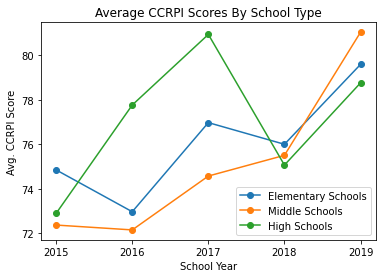

In [90]:
#Plot the averages
x1 = ["2015", 2016, 2017, 2018, 2019]
y1 = [elementary_2015_avg, elementary_2016_avg, elementary_2017_avg, elementary_2018_avg, elementary_2019_avg]

x2 = ["2015", 2016, 2017, 2018, 2019]
y2 = [middle_2015_avg, middle_2016_avg, middle_2017_avg, middle_2018_avg, middle_2019_avg]

x3 = ["2015", 2016, 2017, 2018, 2019]
y3 = [high_2015_avg, high_2016_avg, high_2017_avg, high_2018_avg, high_2019_avg]

p.plot(x1, y1, label = "Elementary Schools", marker="o")
p.plot(x2, y2, label = "Middle Schools", marker="o")
p.plot(x3, y3, label = "High Schools", marker="o")

p.xlabel("School Year")
p.ylabel("Avg. CCRPI Score")

p.title("Average CCRPI Scores By School Type")

p.legend()
p.show()

In [94]:
#Export data to CSV for further manipulation in Tableau
fcs_data_sorted.to_csv('fcs_data_sorted.csv', index=True)
all_schools_avg.to_csv('all_schools_avg.csv', index=True)